In [106]:
import pandas as pd
dataset = pd.read_csv("https://raw.githubusercontent.com/Jacopo21/Startups_multiples/main/companies_data.csv?token=GHSAT0AAAAAACVPHE7SMAPS3G36OZYBE4AOZWF4GBA")

In [107]:
dataset.head()

,Organization Name,Organization Name URL,Growth Category,IPO Status,Company Type,Website,Number of Employees,Acquisition Status,Last Funding Type,Last Funding Date,...,Last Equity Funding Amount (in USD),Last Equity Funding Type,Total Equity Funding Amount,Total Equity Funding Amount Currency,Total Equity Funding Amount (in USD),Total Funding Amount,Total Funding Amount Currency,Total Funding Amount (in USD),Top 5 Investors,Number of Investors
0,Groq,https://www.crunchbase.com/organization/groq,Growing,Private,For Profit,http://groq.com,101-250,Made Acquisitions,Series D,2024-08-05,...,640000000.0,Series D,1.002551e+09,USD,1.002551e+09,1.002551e+09,USD,1.002551e+09,"BlackRock, Alumni Ventures, Neuberger Berman, ...",36.0
1,Protect AI,https://www.crunchbase.com/organization/protec...,Growing,Private,For Profit,https://protectai.com,11-50,Made Acquisitions,Series B,2024-08-02,...,60000000.0,Series B,1.085000e+08,USD,1.085000e+08,1.085000e+08,USD,1.085000e+08,"StepStone Group, Evolution Equity Partners, Ac...",13.0
2,Flo Health,https://www.crunchbase.com/organization/owhealth,Growing,Private,For Profit,https://flo.health,251-500,NaN,Series C,2024-07-30,...,200576013.0,Series C,2.760760e+08,USD,2.760760e+08,2.760760e+08,USD,2.760760e+08,"Founders Fund, Flint Capital, Target Global, G...",12.0
3,DevRev,https://www.crunchbase.com/organization/devrev,Growing,Private,For Profit,https://devrev.ai,251-500,NaN,Series A,2024-08-09,...,100825173.0,Series A,1.508252e+08,USD,1.508252e+08,1.508252e+08,USD,1.508252e+08,"Param Hansa Values, Khosla Ventures, Alumni Ve...",13.0
4,FLYR,https://www.crunchbase.com/organization/flyr,Growing,Private,For Profit,http://flyrlabs.com,501-1000,Made Acquisitions,Series D,2024-08-08,...,225000000.0,Series D,4.118427e+08,USD,4.118427e+08,4.818427e+08,USD,4.818427e+08,"BlackRock, Founders Fund, WestCap, Abu Dhabi I...",42.0


In [108]:
columns_to_drop = [
    "Organization Name URL", "Website"
]
dataset.drop(columns=columns_to_drop, inplace=True)

In [109]:
dataset.columns

Index(['Organization Name', 'Growth Category', 'IPO Status', 'Company Type',
       'Number of Employees', 'Acquisition Status', 'Last Funding Type',
       'Last Funding Date', 'Industries', 'Headquarters Location',
       'Description', 'CB Rank (Company)', 'Investor Type', 'Founded Date',
       'Founded Date Precision', 'Operating Status', 'Actively Hiring',
       'Investment Stage', 'Number of Founders', 'Number of Funding Rounds',
       'Funding Status', 'Last Funding Amount', 'Last Funding Amount Currency',
       'Last Funding Amount (in USD)', 'Last Equity Funding Amount',
       'Last Equity Funding Amount Currency',
       'Last Equity Funding Amount (in USD)', 'Last Equity Funding Type',
       'Total Equity Funding Amount', 'Total Equity Funding Amount Currency',
       'Total Equity Funding Amount (in USD)', 'Total Funding Amount',
       'Total Funding Amount Currency', 'Total Funding Amount (in USD)',
       'Top 5 Investors', 'Number of Investors'],
      dtype='obje

# Feature engineering

these are the features, when handles put in a "-" list:
       'Investor Type', 'Founded Date',
       'Founded Date Precision', 'Operating Status', 'Actively Hiring',
       'Investment Stage', 'Number of Founders', 'Number of Funding Rounds',
       'Funding Status', 'Last Funding Amount', 'Last Funding Amount Currency',
       'Last Funding Amount (in USD)', 'Last Equity Funding Amount',
       'Last Equity Funding Amount Currency',
       'Last Equity Funding Amount (in USD)', 'Last Equity Funding Type',
       'Total Equity Funding Amount', 'Total Equity Funding Amount Currency',
       'Total Equity Funding Amount (in USD)', 'Total Funding Amount',
       'Total Funding Amount Currency', 'Total Funding Amount (in USD)',
       'Top 5 Investors', 'Number of Investors'

To be dropped: Organization Name, Description

Handeled: 
- Growth Category
- IPO Status
- Company Type
- Number of Employees
- Acquisition Status
- Last Funding Type
- Last Funding Date
- Industries
- Headquarters Location
- CB Ranking (Company)

In [110]:
dataset["IPO Status"].unique()
dataset["Growth Category"].unique()

ipo_dummies = pd.get_dummies(dataset["IPO Status"], prefix="Status_")
dataset = pd.concat([dataset, ipo_dummies], axis=1)

growth_dummies = pd.get_dummies(dataset["Growth Category"], prefix="GrowthCategory_")
dataset = pd.concat([dataset, growth_dummies], axis=1)
dataset.head()


,Organization Name,Growth Category,IPO Status,Company Type,Number of Employees,Acquisition Status,Last Funding Type,Last Funding Date,Industries,Headquarters Location,...,Total Equity Funding Amount (in USD),Total Funding Amount,Total Funding Amount Currency,Total Funding Amount (in USD),Top 5 Investors,Number of Investors,Status__Private,GrowthCategory__Growing,GrowthCategory__Not Growing,GrowthCategory__Stable
0,Groq,Growing,Private,For Profit,101-250,Made Acquisitions,Series D,2024-08-05,"Artificial Intelligence (AI), Electronics, Mac...","Mountain View, California, United States",...,1.002551e+09,1.002551e+09,USD,1.002551e+09,"BlackRock, Alumni Ventures, Neuberger Berman, ...",36.0,True,True,False,False
1,Protect AI,Growing,Private,For Profit,11-50,Made Acquisitions,Series B,2024-08-02,"Artificial Intelligence (AI), Cyber Security, ...","Seattle, Washington, United States",...,1.085000e+08,1.085000e+08,USD,1.085000e+08,"StepStone Group, Evolution Equity Partners, Ac...",13.0,True,True,False,False
2,Flo Health,Growing,Private,For Profit,251-500,NaN,Series C,2024-07-30,"Apps, Artificial Intelligence (AI), Health Car...","London, England, United Kingdom",...,2.760760e+08,2.760760e+08,USD,2.760760e+08,"Founders Fund, Flint Capital, Target Global, G...",12.0,True,True,False,False
3,DevRev,Growing,Private,For Profit,251-500,NaN,Series A,2024-08-09,"Artificial Intelligence (AI), CRM, Customer Se...","Palo Alto, California, United States",...,1.508252e+08,1.508252e+08,USD,1.508252e+08,"Param Hansa Values, Khosla Ventures, Alumni Ve...",13.0,True,True,False,False
4,FLYR,Growing,Private,For Profit,501-1000,Made Acquisitions,Series D,2024-08-08,"Air Transportation, Analytics, Artificial Inte...","Santa Monica, California, United States",...,4.118427e+08,4.818427e+08,USD,4.818427e+08,"BlackRock, Founders Fund, WestCap, Abu Dhabi I...",42.0,True,True,False,False


In [130]:
# Group variables starting with Status_ and GrowthCategory_ for being used later in randomforest
status_columns = [col for col in dataset.columns if col.startswith("Status_")]
growth_columns = [col for col in dataset.columns if col.startswith("GrowthCategory_")]
company = status_columns + growth_columns
status_columns, growth_columns


(['Status__Private'],
 ['GrowthCategory__Growing',
  'GrowthCategory__Not Growing',
  'GrowthCategory__Stable'])

In [111]:
dataset["Company Type"].unique()
dataset["Company Type"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8141 entries, 0 to 8140
Series name: Company Type
Non-Null Count  Dtype 
--------------  ----- 
8141 non-null   object
dtypes: object(1)
memory usage: 63.7+ KB


In [112]:
company_type_dummies = pd.get_dummies(dataset["Company Type"], prefix="CompanyType_")
dataset = pd.concat([dataset, company_type_dummies], axis=1)
dataset.head()

,Organization Name,Growth Category,IPO Status,Company Type,Number of Employees,Acquisition Status,Last Funding Type,Last Funding Date,Industries,Headquarters Location,...,Total Funding Amount,Total Funding Amount Currency,Total Funding Amount (in USD),Top 5 Investors,Number of Investors,Status__Private,GrowthCategory__Growing,GrowthCategory__Not Growing,GrowthCategory__Stable,CompanyType__For Profit
0,Groq,Growing,Private,For Profit,101-250,Made Acquisitions,Series D,2024-08-05,"Artificial Intelligence (AI), Electronics, Mac...","Mountain View, California, United States",...,1.002551e+09,USD,1.002551e+09,"BlackRock, Alumni Ventures, Neuberger Berman, ...",36.0,True,True,False,False,True
1,Protect AI,Growing,Private,For Profit,11-50,Made Acquisitions,Series B,2024-08-02,"Artificial Intelligence (AI), Cyber Security, ...","Seattle, Washington, United States",...,1.085000e+08,USD,1.085000e+08,"StepStone Group, Evolution Equity Partners, Ac...",13.0,True,True,False,False,True
2,Flo Health,Growing,Private,For Profit,251-500,NaN,Series C,2024-07-30,"Apps, Artificial Intelligence (AI), Health Car...","London, England, United Kingdom",...,2.760760e+08,USD,2.760760e+08,"Founders Fund, Flint Capital, Target Global, G...",12.0,True,True,False,False,True
3,DevRev,Growing,Private,For Profit,251-500,NaN,Series A,2024-08-09,"Artificial Intelligence (AI), CRM, Customer Se...","Palo Alto, California, United States",...,1.508252e+08,USD,1.508252e+08,"Param Hansa Values, Khosla Ventures, Alumni Ve...",13.0,True,True,False,False,True
4,FLYR,Growing,Private,For Profit,501-1000,Made Acquisitions,Series D,2024-08-08,"Air Transportation, Analytics, Artificial Inte...","Santa Monica, California, United States",...,4.818427e+08,USD,4.818427e+08,"BlackRock, Founders Fund, WestCap, Abu Dhabi I...",42.0,True,True,False,False,True


,Organization Name,Growth Category,IPO Status,Company Type,Number of Employees,Acquisition Status,Last Funding Type,Last Funding Date,Industries,Headquarters Location,...,CompanyType__For Profit,NumberEmployees__1-10,NumberEmployees__10001+,NumberEmployees__1001-5000,NumberEmployees__101-250,NumberEmployees__11-50,NumberEmployees__251-500,NumberEmployees__5001-10000,NumberEmployees__501-1000,NumberEmployees__51-100
0,Groq,Growing,Private,For Profit,101-250,Made Acquisitions,Series D,2024-08-05,"Artificial Intelligence (AI), Electronics, Mac...","Mountain View, California, United States",...,True,False,False,False,True,False,False,False,False,False
1,Protect AI,Growing,Private,For Profit,11-50,Made Acquisitions,Series B,2024-08-02,"Artificial Intelligence (AI), Cyber Security, ...","Seattle, Washington, United States",...,True,False,False,False,False,True,False,False,False,False
2,Flo Health,Growing,Private,For Profit,251-500,NaN,Series C,2024-07-30,"Apps, Artificial Intelligence (AI), Health Car...","London, England, United Kingdom",...,True,False,False,False,False,False,True,False,False,False
3,DevRev,Growing,Private,For Profit,251-500,NaN,Series A,2024-08-09,"Artificial Intelligence (AI), CRM, Customer Se...","Palo Alto, California, United States",...,True,False,False,False,False,False,True,False,False,False
4,FLYR,Growing,Private,For Profit,501-1000,Made Acquisitions,Series D,2024-08-08,"Air Transportation, Analytics, Artificial Inte...","Santa Monica, California, United States",...,True,False,False,False,False,False,False,False,True,False


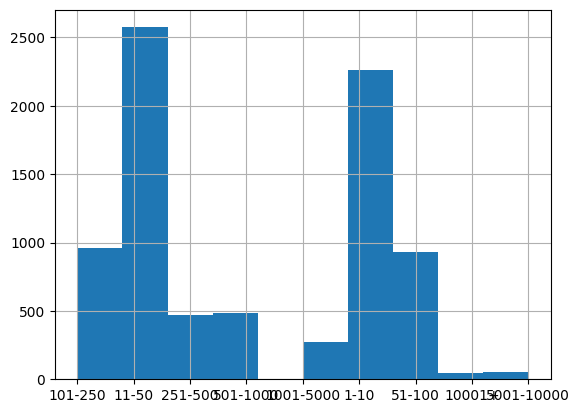

In [113]:
dataset["Number of Employees"].hist()
N_employees_dummies = pd.get_dummies(dataset["Number of Employees"], prefix="NumberEmployees_")
dataset = pd.concat([dataset, N_employees_dummies], axis=1)
dataset.head()

<Axes: >

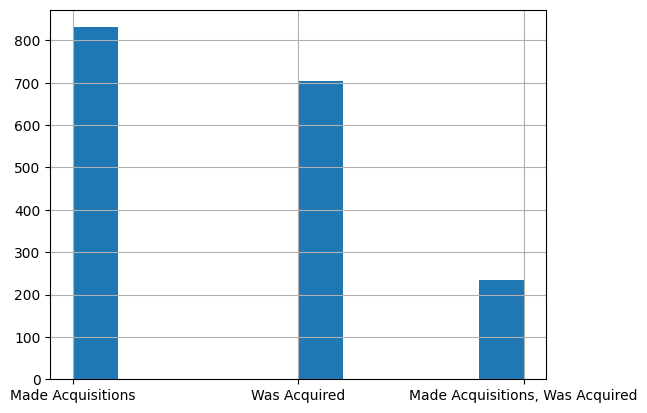

In [114]:
dataset["Acquisition Status"].hist()

In [115]:
Acquisition_Status_dummies = pd.get_dummies(dataset["Acquisition Status"], prefix="AcquisitionStatus_")
dataset = pd.concat([dataset, Acquisition_Status_dummies], axis=1)
dataset.head()

,Organization Name,Growth Category,IPO Status,Company Type,Number of Employees,Acquisition Status,Last Funding Type,Last Funding Date,Industries,Headquarters Location,...,NumberEmployees__1001-5000,NumberEmployees__101-250,NumberEmployees__11-50,NumberEmployees__251-500,NumberEmployees__5001-10000,NumberEmployees__501-1000,NumberEmployees__51-100,AcquisitionStatus__Made Acquisitions,"AcquisitionStatus__Made Acquisitions, Was Acquired",AcquisitionStatus__Was Acquired
0,Groq,Growing,Private,For Profit,101-250,Made Acquisitions,Series D,2024-08-05,"Artificial Intelligence (AI), Electronics, Mac...","Mountain View, California, United States",...,False,True,False,False,False,False,False,True,False,False
1,Protect AI,Growing,Private,For Profit,11-50,Made Acquisitions,Series B,2024-08-02,"Artificial Intelligence (AI), Cyber Security, ...","Seattle, Washington, United States",...,False,False,True,False,False,False,False,True,False,False
2,Flo Health,Growing,Private,For Profit,251-500,NaN,Series C,2024-07-30,"Apps, Artificial Intelligence (AI), Health Car...","London, England, United Kingdom",...,False,False,False,True,False,False,False,False,False,False
3,DevRev,Growing,Private,For Profit,251-500,NaN,Series A,2024-08-09,"Artificial Intelligence (AI), CRM, Customer Se...","Palo Alto, California, United States",...,False,False,False,True,False,False,False,False,False,False
4,FLYR,Growing,Private,For Profit,501-1000,Made Acquisitions,Series D,2024-08-08,"Air Transportation, Analytics, Artificial Inte...","Santa Monica, California, United States",...,False,False,False,False,False,True,False,True,False,False


In [116]:
dataset['Last Funding Type'].unique(), dataset['Last Funding Date'].describe()
Funding_type_dummies = pd.get_dummies(dataset["Last Funding Type"], prefix="FundingType_")
dataset = pd.concat([dataset, Funding_type_dummies], axis=1)

dataset['Last Funding Date'] = pd.to_datetime(dataset['Last Funding Date'], format='%Y-%m-%d')

dataset.head()

,Organization Name,Growth Category,IPO Status,Company Type,Number of Employees,Acquisition Status,Last Funding Type,Last Funding Date,Industries,Headquarters Location,...,FundingType__Series A,FundingType__Series B,FundingType__Series C,FundingType__Series D,FundingType__Series E,FundingType__Series F,FundingType__Series G,FundingType__Series H,FundingType__Series I,FundingType__Series J
0,Groq,Growing,Private,For Profit,101-250,Made Acquisitions,Series D,2024-08-05,"Artificial Intelligence (AI), Electronics, Mac...","Mountain View, California, United States",...,False,False,False,True,False,False,False,False,False,False
1,Protect AI,Growing,Private,For Profit,11-50,Made Acquisitions,Series B,2024-08-02,"Artificial Intelligence (AI), Cyber Security, ...","Seattle, Washington, United States",...,False,True,False,False,False,False,False,False,False,False
2,Flo Health,Growing,Private,For Profit,251-500,NaN,Series C,2024-07-30,"Apps, Artificial Intelligence (AI), Health Car...","London, England, United Kingdom",...,False,False,True,False,False,False,False,False,False,False
3,DevRev,Growing,Private,For Profit,251-500,NaN,Series A,2024-08-09,"Artificial Intelligence (AI), CRM, Customer Se...","Palo Alto, California, United States",...,True,False,False,False,False,False,False,False,False,False
4,FLYR,Growing,Private,For Profit,501-1000,Made Acquisitions,Series D,2024-08-08,"Air Transportation, Analytics, Artificial Inte...","Santa Monica, California, United States",...,False,False,False,True,False,False,False,False,False,False


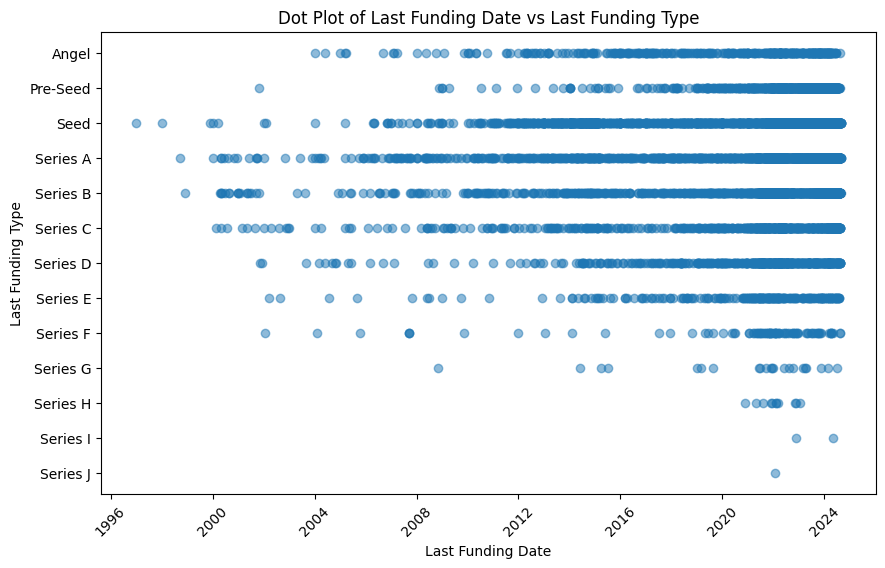

In [117]:
# create a plot of last funding type vs. last funding date
import matplotlib.pyplot as plt
dataset['Last Funding Date'] = pd.to_datetime(dataset['Last Funding Date'], format='%Y-%m-%d')
filtered_dataset = dataset[dataset['Last Funding Date'] >= '1995-01-01']
filtered_dataset = filtered_dataset.sort_values(by='Last Funding Type', ascending=False)

plt.figure(figsize=(10, 6))
plt.scatter(filtered_dataset['Last Funding Date'], filtered_dataset['Last Funding Type'], alpha=0.5)
plt.title('Dot Plot of Last Funding Date vs Last Funding Type')
plt.xlabel('Last Funding Date')
plt.ylabel('Last Funding Type')
plt.xticks(rotation=45)
plt.show()

In [118]:
dataset["Industries"].unique()
industry_dummies = dataset["Industries"].str.get_dummies(sep=',').add_prefix('Industry_')
dataset = pd.concat([dataset, industry_dummies], axis=1)

In [133]:
industries = dataset.columns[dataset.columns.str.startswith('Industry_')]

In [119]:
unique_headquarters = dataset["Headquarters Location"].unique()
unique_headquarters_df = pd.DataFrame(unique_headquarters, columns=["Headquarters Location"])
unique_headquarters_df

,Headquarters Location
0,"Mountain View, California, United States"
1,"Seattle, Washington, United States"
2,"London, England, United Kingdom"
3,"Palo Alto, California, United States"
4,"Santa Monica, California, United States"
...,...
1489,"Beney Beraq, Tel Aviv, Israel"
1490,"Baar, Zug, Switzerland"
1491,"Hopkinton, Massachusetts, United States"
1492,"Mason, Ohio, United States"


In [120]:
headquarters_dummies = dataset["Headquarters Location"].str.split(', ', expand=True)
headquarters_dummies.drop(columns=[3], inplace=True)
headquarters_dummies

,0,1,2
0,Mountain View,California,United States
1,Seattle,Washington,United States
2,London,England,United Kingdom
3,Palo Alto,California,United States
4,Santa Monica,California,United States
...,...,...,...
8136,San Francisco,California,United States
8137,Kitchener,Ontario,Canada
8138,Paris,Ile-de-France,France
8139,Acworth,Georgia,United States


In [121]:
# create dummies for headquarters location but consider two layers of dummies: 
# the first you should consider the country and the second the region, such that: if "Palo Alto, California, United States" 
# then create a dummy for country "country_United States" and a dummy for region "region_California"
headquarters_dummies.columns = ["City", "Region", "Country"]
headquarters_dummies = pd.get_dummies(headquarters_dummies, prefix=["City_", "Region_", "Country_"])
dataset = pd.concat([dataset, headquarters_dummies], axis=1)


In [ ]:
location = [col for col in dataset.columns if col.startswith("City_") or col.startswith("Region_") or col.startswith("Country_")]
location

In [122]:
dataset['CB Rank (Company)'] = dataset['CB Rank (Company)'].str.replace(',', '')
dataset['CB Rank (Company)'] = dataset['CB Rank (Company)'].astype(int)

In [123]:
min_value = dataset['CB Rank (Company)'].min().round(1)
max_value = dataset['CB Rank (Company)'].max().round(1)
mean_value = dataset['CB Rank (Company)'].mean().round(1)
median_value = dataset['CB Rank (Company)'].median().round(1)

# Create a DataFrame to store the statistics
stats_df = pd.DataFrame({
    'Statistic': ['Min', 'Max', 'Mean', 'Median'],
    'Value': [min_value, max_value, mean_value, median_value]
})
stats_df

,Statistic,Value
0,Min,5.0
1,Max,3463417.0
2,Mean,98045.0
3,Median,30059.0


- Extremely High: This category should include the top 0.1% of values., Threshold: Rank values between 5.0 and approximately 100.
- High: This category should include the next 1% of values. Threshold: Rank values between 101 and approximately 1,000.
- Medium-High: This category includes the next 10% of values. Threshold: Rank values between 1,001 and approximately 10,000.
- Medium: This is the middle category and could include the next 30% of values. Threshold: Rank values between 10,001 and approximately 50,000.
- Medium-Low: This category includes the next 30% of values. Threshold: Rank values between 50,001 and approximately 300,000.
- Low: This category includes the next 20% of values. Threshold: Rank values between 300,001 and approximately 1,000,000.
- Extremely Low: This category includes the bottom 8.9% of values. Threshold: Rank values between 1,000,001 and 3,463,417.

In [124]:
cb_rank = dataset['CB Rank (Company)']

def classify_cb_rank(rank):
    if rank <= 100:
        return 'Extremely High'
    elif rank <= 1000:
        return 'High'
    elif rank <= 10000:
        return 'Medium-High'
    elif rank <= 50000:
        return 'Medium'
    elif rank <= 300000:
        return 'Medium-Low'
    elif rank <= 1000000:
        return 'Low'
    else:
        return 'Extremely Low'

dataset['CB Rank Class'] = cb_rank.apply(classify_cb_rank)

cb_rank_dummies = pd.get_dummies(dataset['CB Rank Class'], prefix='CB Rank')

dataset = pd.concat([dataset, cb_rank_dummies], axis=1)

dataset.drop('CB Rank Class', axis=1, inplace=True)
dataset.head(3)

,Organization Name,Growth Category,IPO Status,Company Type,Number of Employees,Acquisition Status,Last Funding Type,Last Funding Date,Industries,Headquarters Location,...,Country__Vietnam,Country__Zambia,Country__Zimbabwe,CB Rank_Extremely High,CB Rank_Extremely Low,CB Rank_High,CB Rank_Low,CB Rank_Medium,CB Rank_Medium-High,CB Rank_Medium-Low
0,Groq,Growing,Private,For Profit,101-250,Made Acquisitions,Series D,2024-08-05,"Artificial Intelligence (AI), Electronics, Mac...","Mountain View, California, United States",...,False,False,False,True,False,False,False,False,False,False
1,Protect AI,Growing,Private,For Profit,11-50,Made Acquisitions,Series B,2024-08-02,"Artificial Intelligence (AI), Cyber Security, ...","Seattle, Washington, United States",...,False,False,False,True,False,False,False,False,False,False
2,Flo Health,Growing,Private,For Profit,251-500,NaN,Series C,2024-07-30,"Apps, Artificial Intelligence (AI), Health Car...","London, England, United Kingdom",...,False,False,False,True,False,False,False,False,False,False


In [134]:
ranking = [col for col in dataset.columns if col.startswith("CB Rank")]

# Dealing with financial variables
- Investment Stage,
- Number of Founders,
- Number of Funding Rounds,
- Funding Status, 
- Last Equity Funding Type
- Last Funding Amount, -> KEEP -> Last Funding Amount (in USD)'
- Last Funding Amount Currency,
- Last Equity Funding Amount',
- Last Equity Funding Amount Currency',
- Last Equity Funding Amount (in USD)', 'Last Equity Funding Type,
- Total Equity Funding Amount', 'Total Equity Funding Amount Currency,
- Total Equity Funding Amount (in USD)', 'Total Funding Amount,
- Total Funding Amount Currency', -> KEEP -> Total Funding Amount (in USD)

In [ ]:
columns = 

In [ ]:
dataset["y"] = dataset["Last Funding Amount Currency (in USD)"]

# Variable summary for XGBoost 2.0

In [ ]:
company, location, industries, ranking
